In [1]:
import utilities.variables as variables 
import yfinance as yf
import pandas as pd
import numpy as np
import importlib
from pypfopt import EfficientFrontier, risk_models, expected_returns
import utilities.parser as parser
import utilities.api_esg_service as esg_service
import utilities.api_ticker_service as data_ticker_service
importlib.reload(data_ticker_service)
importlib.reload(parser)
importlib.reload(esg_service)

<module 'utilities.api_esg_service' from '/Users/herbishtini/Documents/UNI/Master Thesis/sustainability_portfolio_optimisation/utilities/api_esg_service.py'>

In [62]:
df = pd.read_csv('../data/data_10_monthly_returns_complete.csv', parse_dates=True, index_col="Date")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
returns = df.pct_change().dropna()
mu = expected_returns.mean_historical_return(df)
mu

KE      0.732821
SCS     0.133374
HNI     0.389596
AVT     0.070763
ACCO    0.304005
          ...   
HALO    0.157224
MATW    0.007613
KVHI    0.043419
NEO     0.240446
UNP     0.059475
Length: 957, dtype: float64

In [6]:
# esg_service.generate_esg_data()
#esg_service.generate_esg_data_for_each_industry()

In [4]:
ticker = yf.Ticker('3462.T')
print(ticker.info)

{'address1': 'Nishishinjuku 8-5-1', 'address2': 'Shinjuku-ku', 'city': 'Tokyo', 'zip': '160-0023', 'country': 'Japan', 'phone': '81 3 3365 8767', 'website': 'https://www.nre-mf.co.jp', 'industry': 'REIT - Retail', 'industryKey': 'reit-retail', 'industryDisp': 'REIT - Retail', 'sector': 'Real Estate', 'sectorKey': 'real-estate', 'sectorDisp': 'Real Estate', 'longBusinessSummary': 'Nomura Real Estate Master Fund, Inc. (NMF) is a real estate investment corporation formed to own and invest primarily in office buildings, retail facilities, logistics and residential facilities. NMF is externally managed by a licensed asset management company, Nomura Real Estate Asset Management Co., Ltd. ("NREAM"). NREAM is a wholly-owned subsidiary of Nomura Real Estate Holdings, Inc. NMF was established on October 1, 2015 through the consolidation type merger involving the former Nomura Real Estate Master Fund, Inc. (hereinafter the "former NMF"), Nomura Real Estate Office Fund, Inc. (hereinafter "NOF") an

In [22]:
# List of stock symbols
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Dictionary to store market capitalizations
market_caps = {}

# Fetch market capitalization for each symbol
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    market_cap = ticker.info.get('marketCap', 'pegRatio')  # Use 'N/A' if marketCap is not available
    market_caps[symbol] = market_cap

# Print the market capitalizations
for symbol, market_cap in market_caps.items():
    print(f"{symbol}: {market_cap}")

AttributeError: 'list' object has no attribute 'upper'

In [64]:
tickers = yf.Tickers('MSFT') # 'msft aapl goog'
tickers.tickers['MSFT'].info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [8]:
#data = yf.download("MSFT", period="1mo") # start="2022-01-01", end=None
data = yf.download("ROKU", start="1999-01-01", end='2024-01-01', interval="1mo")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-01,25.200001,26.280001,18.350000,20.379999,20.379999,103623700
2017-11-01,20.440001,51.799999,18.561001,43.900002,43.900002,344180400
2017-12-01,43.740002,58.799999,37.810001,51.779999,51.779999,155492200
2018-01-01,52.639999,57.416000,39.099998,40.619999,40.619999,118705900
2018-02-01,40.349998,52.700001,39.009998,40.770000,40.770000,100262800
...,...,...,...,...,...,...
2023-08-01,95.510002,98.440002,75.120003,81.199997,81.199997,150684200
2023-09-01,81.830002,95.839996,66.660004,70.589996,70.589996,148829200
2023-10-01,70.209999,75.449997,55.020000,59.570000,59.570000,116384700


In [55]:
data['Monthly Return'] = 1 + data['Adj Close'].pct_change()
data_dropped = data.round(2).dropna()
data_dropped

Date
2017-11-01    2.15
2017-12-01    1.18
2018-01-01    0.78
2018-02-01    1.00
2018-03-01    0.76
              ... 
2023-08-01    0.84
2023-09-01    0.87
2023-10-01    0.84
2023-11-01    1.75
2023-12-01    0.88
Name: Monthly Return, Length: 74, dtype: float64

In [65]:
data_dropped.to_list()

[2.15,
 1.18,
 0.78,
 1.0,
 0.76,
 1.05,
 1.15,
 1.14,
 1.07,
 1.31,
 1.23,
 0.76,
 0.73,
 0.75,
 1.47,
 1.47,
 0.97,
 0.99,
 1.42,
 1.0,
 1.14,
 1.46,
 0.67,
 1.45,
 1.09,
 0.83,
 0.9,
 0.94,
 0.77,
 1.39,
 0.9,
 1.06,
 1.33,
 1.12,
 1.09,
 1.07,
 1.45,
 1.13,
 1.17,
 1.02,
 0.82,
 1.05,
 1.01,
 1.32,
 0.93,
 0.82,
 0.89,
 0.97,
 0.75,
 1.0,
 0.72,
 0.85,
 0.9,
 0.74,
 1.02,
 0.87,
 0.8,
 1.04,
 0.83,
 0.98,
 1.07,
 0.69,
 1.41,
 1.13,
 1.02,
 0.85,
 1.04,
 1.1,
 1.51,
 0.84,
 0.87,
 0.84,
 1.75,
 0.88]

In [66]:
current_price = 20.379999
for factor in data_dropped.to_list():
    current_price *= factor
current_price

88.47005754723118

In [30]:
decimal_returns = data['Monthly Return'].notna().to_list()

In [49]:
arithmetic_mean = np.mean(data['Monthly Return'])
arithmetic_mean

5.000637410490707

In [34]:
geometric_mean = np.prod([1 + r for r in decimal_returns]) ** (1/len(decimal_returns)) - 1
geometric_mean

-1.0

In [73]:
pd.Series(['ROKU', 'MSFT']).tolist()

['ROKU', 'MSFT']

In [82]:
df_monthly_returns = data_ticker_service.get_returns_in_chunks(['ROKU', 'MSFT'], '1999-08-01', '2024-08-01', interval='1mo', chunk_size=2, sleep_duration=5)
df_monthly_returns

Pausing to avoid overloading the API...


,ROKU,MSFT
Date,,
1999-08-01,NaN,28.588154
1999-09-01,NaN,27.970472
1999-10-01,NaN,28.588154
1999-11-01,NaN,28.120068
1999-12-01,NaN,36.058556
...,...,...
2024-03-01,65.169998,419.962494
2024-04-01,57.660000,388.628998
2024-05-01,57.400002,414.382568


In [77]:
df_monthly_returns

NameError: name 'df_monthly_returns' is not defined

In [3]:
pd.date_range(start='2023-01-01', periods=12, freq='M')

/var/folders/8f/b5rl_hw50bn0_k4xrt7mtm7w0000gn/T/ipykernel_27328/264734790.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023-01-01', periods=12, freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [1]:
import seaborn as sns

# Sample data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Return Rate': [0.02, 0.015, 0.03, 0.025, -0.01, 0.05, 0.04, 0.035, -0.02, 0.025, 0.03, 0.02],
    'Volatility': [0.01, 0.015, 0.02, 0.025, 0.03, 0.02, 0.015, 0.01, 0.02, 0.025, 0.03, 0.015]
}

df = pd.DataFrame(data)

# Plotting
sns.set(style="whitegrid")
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Return Rate', data=df, ax=ax1, color='green')
sns.lineplot(x='Date', y='Volatility', data=df, ax=ax2, color='blue')

ax1.set_xlabel('Date')
ax1.set_ylabel('Return Rate', color='green')
ax2.set_ylabel('Volatility', color='blue')

plt.title('Volatility and Return Rate Over Time')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

/var/folders/8f/b5rl_hw50bn0_k4xrt7mtm7w0000gn/T/ipykernel_32961/661769545.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),


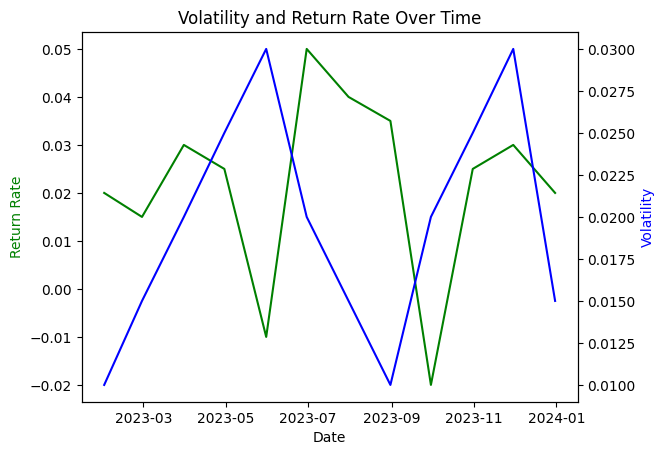

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Return Rate': [0.02, 0.015, 0.03, 0.025, -0.01, 0.05, 0.04, 0.035, -0.02, 0.025, 0.03, 0.02],
    'Volatility': [0.01, 0.015, 0.02, 0.025, 0.03, 0.02, 0.015, 0.01, 0.02, 0.025, 0.03, 0.015]
}

df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['Date'], df['Return Rate'], 'g-')
ax2.plot(df['Date'], df['Volatility'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Return Rate', color='g')
ax2.set_ylabel('Volatility', color='b')

plt.title('Volatility and Return Rate Over Time')
plt.show()


In [3]:
import plotly.graph_objects as go
import pandas as pd

# Sample data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Return Rate': [0.02, 0.015, 0.03, 0.025, -0.01, 0.05, 0.04, 0.035, -0.02, 0.025, 0.03, 0.02],
    'Volatility': [0.01, 0.015, 0.02, 0.025, 0.03, 0.02, 0.015, 0.01, 0.02, 0.025, 0.03, 0.015]
}

df = pd.DataFrame(data)

# Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Return Rate'],
                         mode='lines', name='Return Rate',
                         line=dict(color='green')))

fig.add_trace(go.Scatter(x=df['Date'], y=df['Volatility'],
                         mode='lines', name='Volatility',
                         line=dict(color='blue'),
                         yaxis='y2'))

# Create secondary y-axis
fig.update_layout(
    title="Volatility and Return Rate Over Time",
    xaxis_title="Date",
    yaxis_title="Return Rate",
    yaxis2=dict(
        title="Volatility",
        overlaying='y',
        side='right'
    )
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

In [16]:
import numpy as np
import pandas as pd

from pypfopt import (
    EfficientFrontier,
    expected_returns,
    risk_models,
)

# Reading in the data; preparing expected returns and a risk model
df = pd.read_csv("../data/test_stock_prices.csv", parse_dates=True, index_col="date")
returns = df.pct_change().dropna()
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)


# Now try with a nonconvex objective from  Kolm et al (2014)
def deviation_risk_parity(w, cov_matrix):
    diff = w * np.dot(cov_matrix, w) - (w * np.dot(cov_matrix, w)).reshape(-1, 1)
    return (diff**2).sum().sum()


ef = EfficientFrontier(mu, S)
weights = ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
# ef.portfolio_performance(verbose=True)

In [17]:
S

,GOOG,AAPL,FB,BABA,AMZN,GE,AMD,WMT,BAC,GM,T,UAA,SHLD,XOM,RRC,BBY,MA,PFE,JPM,SBUX
GOOG,0.093211,0.046202,0.030801,0.029793,0.054508,0.033202,0.045523,0.017285,0.056369,0.023760,0.023128,0.049127,0.034392,0.027977,0.039129,0.033809,0.046931,0.022495,0.048596,0.037831
AAPL,0.046202,0.207537,0.021141,0.023839,0.079294,0.038348,0.084594,0.026599,0.046262,0.022377,0.019974,0.047580,0.042163,0.020366,0.032878,0.049032,0.047051,0.021461,0.047115,0.043945
FB,0.030801,0.021141,0.137201,0.030073,0.036893,0.014790,0.028064,0.006083,0.022944,0.016759,0.006822,0.045494,0.010939,0.010875,0.013685,0.018464,0.022726,0.012496,0.018556,0.021882
BABA,0.029793,0.023839,0.030073,0.100958,0.033414,0.016409,0.050569,0.008732,0.024664,0.020554,0.007204,0.027954,0.025315,0.014194,0.024290,0.019633,0.025436,0.013162,0.021288,0.017427
AMZN,0.054508,0.079294,0.036893,0.033414,0.375394,0.052262,0.103257,0.037463,0.066982,0.025195,0.025594,0.064189,0.052116,0.026879,0.040665,0.081761,0.055378,0.033235,0.072853,0.065904
GE,0.033202,0.038348,0.014790,0.016409,0.052262,0.083109,0.048893,0.029263,0.063275,0.029115,0.026634,0.058264,0.048975,0.025981,0.033240,0.041641,0.046593,0.030084,0.059512,0.038070
AMD,0.045523,0.084594,0.028064,0.050569,0.103257,0.048893,0.390586,0.027288,0.068712,0.045382,0.026953,0.069835,0.067462,0.028126,0.055601,0.066571,0.064909,0.028145,0.070040,0.057153
WMT,0.017285,0.026599,0.006083,0.008732,0.037463,0.029263,0.027288,0.069092,0.030757,0.013886,0.021120,0.027989,0.029773,0.017146,0.013551,0.037625,0.023123,0.023309,0.033229,0.028163
BAC,0.056369,0.046262,0.022944,0.024664,0.066982,0.063275,0.068712,0.030757,0.180192,0.048546,0.034066,0.093508,0.075228,0.032366,0.050768,0.052498,0.085778,0.035209,0.116912,0.052539
GM,0.023760,0.022377,0.016759,0.020554,0.025195,0.029115,0.045382,0.013886,0.048546,0.080116,0.015221,0.037477,0.043757,0.022664,0.029205,0.029999,0.028186,0.018643,0.039273,0.024758


In [15]:
S.head(3)

,GOOG,AAPL,FB,BABA,AMZN,GE,AMD,WMT,BAC,GM,T,UAA,SHLD,XOM,RRC,BBY,MA,PFE,JPM,SBUX
GOOG,0.093211,0.046202,0.030801,0.029793,0.054508,0.033202,0.045523,0.017285,0.056369,0.023760,0.023128,0.049127,0.034392,0.027977,0.039129,0.033809,0.046931,0.022495,0.048596,0.037831
AAPL,0.046202,0.207537,0.021141,0.023839,0.079294,0.038348,0.084594,0.026599,0.046262,0.022377,0.019974,0.047580,0.042163,0.020366,0.032878,0.049032,0.047051,0.021461,0.047115,0.043945
FB,0.030801,0.021141,0.137201,0.030073,0.036893,0.014790,0.028064,0.006083,0.022944,0.016759,0.006822,0.045494,0.010939,0.010875,0.013685,0.018464,0.022726,0.012496,0.018556,0.021882
